<a href="https://colab.research.google.com/github/jellybeanJoo/PyTorchZeroToAll/blob/main/VanillaGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torchvision
import torch
train_data = torchvision.datasets.MNIST(train=True,root='/content',download=True,
                                       transform=torchvision.transforms.ToTensor())
test_data = torchvision.datasets.MNIST(train=False,root='/content',download=True,
                                       transform=torchvision.transforms.ToTensor())
train_dataloader = torch.utils.data.DataLoader(batch_size=64,shuffle=True,dataset=train_data)
test_dataloader = torch.utils.data.DataLoader(batch_size=64,shuffle=True,dataset=test_data)


In [ ]:
#dcgan에서는 batch normalization때문에 torch.cat x

In [ ]:
import torch
import torch.nn as nn

class Generator(nn.Module):
  def __init__(self):
    super(Generator,self).__init__()
    self.total_layer = nn.Sequential(
                          nn.Linear(128,256),
                          nn.LeakyReLU(0.2),
                          nn.Linear(256,512),
                          nn.LeakyReLU(0.2),
                          nn.Linear(512,1024),
                          nn.LeakyReLU(0.2),
                          nn.Linear(1024,784),
                          nn.Tanh()
    )
  def forward(self,x):
    x = self.total_layer(x)
    x = x.view(-1,1,28,28)
    return x

class Discriminator(nn.Module):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.total_layer = nn.Sequential(
                          nn.Linear(784,1024),
                          nn.LeakyReLU(0.2),
                          nn.Linear(1024,512),
                          nn.LeakyReLU(0.2),
                          nn.Linear(512,256),
                          nn.LeakyReLU(0.2),
                          nn.Linear(256,1),
                          nn.Sigmoid()
    )
  def forward(self,x):
    x = x.view(-1,784)
    x = self.total_layer(x)
    return x

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

G = Generator().to(device)
D = Discriminator().to(device)
loss_g = nn.BCELoss()
loss_d = nn.BCELoss()
optimizer_g = torch.optim.SGD(G.parameters(),lr=1e-4)
optimizer_d = torch.optim.SGD(D.parameters(),lr=1e-4)

In [ ]:
import matplotlib.pyplot as plt
from torchvision.utils import make_grid,save_image
import numpy as np

for epoch in range(200):
  for data,target in train_dataloader:
    real_label = torch.ones(data.shape[0],1).to(device)
    fake_label = torch.zeros(data.shape[0],1).to(device)

    noise = torch.randn(data.shape[0],128).to(device)
    picture = G(noise)
    lg = loss_g(D(picture),real_label)
    optimizer_g.zero_grad()
    lg.backward()
    optimizer_g.step()

    picture = picture.detach()
    data = data.to(device)
    ld = loss_d(D(torch.cat((data,picture),dim=0)),torch.cat((real_label,fake_label),dim=0))
    optimizer_d.zero_grad()
    ld.backward()
    optimizer_d.step()
  if epoch%20==0:
    picture = make_grid(picture.cpu().detach())
    npimg=picture.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()

  # if epoch%20==0:
  #   picture = picture.squeeze().to('cpu')
  #   plt.imshow(picture[0],'gray')
  #   plt.show()

In [ ]:
import numpy as np
picture = picture.view(-1,1,28,28)
picture = make_grid(picture.cpu().detach())
print(picture.shape)
npimg = picture.numpy()
plt.imshow(np.transpose(npimg,(1,2,0)))
plt.show()

In [ ]:
a,b = next(iter(train_dataloader))


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


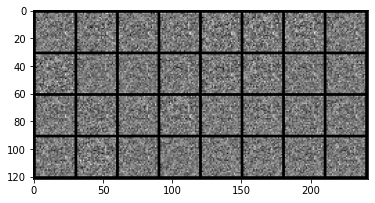

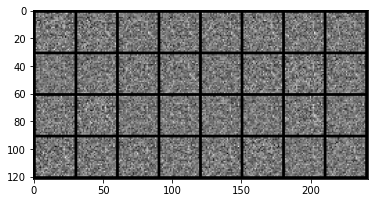

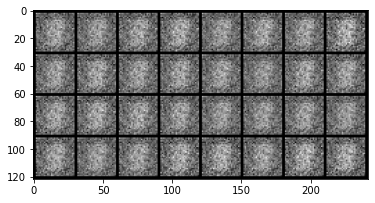

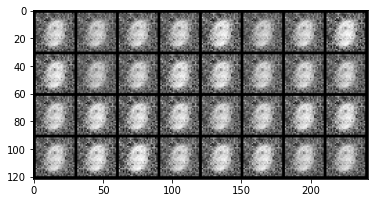

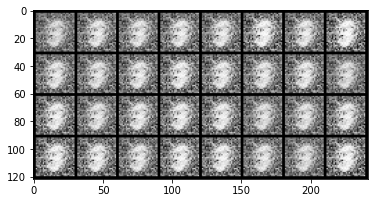

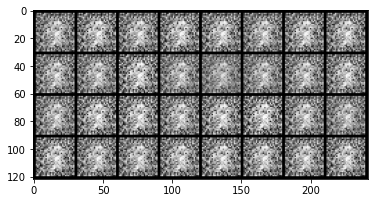

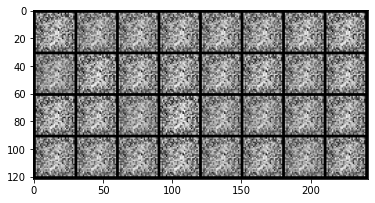

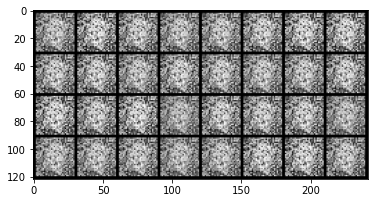

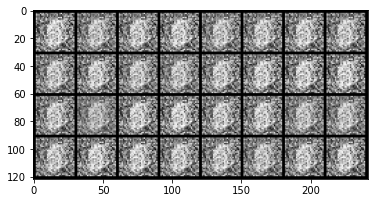

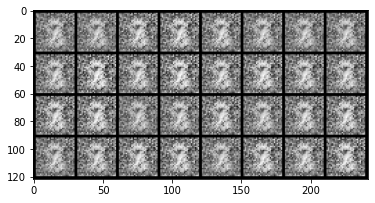

In [ ]:
import torch
import torch.nn as nn

class Generator(nn.Module):
  def __init__(self):
    super(Generator,self).__init__()
    self.total_layer = nn.Sequential(
                          nn.Linear(128,256),
                          nn.LeakyReLU(0.2),
                          nn.Linear(256,512),
                          nn.LeakyReLU(0.2),
                          nn.Linear(512,1024),
                          nn.LeakyReLU(0.2),
                          nn.Linear(1024,784),
                          nn.Tanh()
    )
  def forward(self,x):
    x = self.total_layer(x)
    x = x.view(-1,1,28,28)
    return x

class Discriminator(nn.Module):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.total_layer = nn.Sequential(
                          nn.Linear(784,1024),
                          nn.LeakyReLU(0.2),
                          nn.Linear(1024,512),
                          nn.LeakyReLU(0.2),
                          nn.Linear(512,256),
                          nn.LeakyReLU(0.2),
                          nn.Linear(256,1),
                          nn.Sigmoid()
    )
  def forward(self,x):
    x = x.view(-1,784)
    x = self.total_layer(x)
    return x

device = 'cuda' if torch.cuda.is_available() else 'cpu'

G = Generator().to(device)
D = Discriminator().to(device)
loss_g = nn.BCELoss()
loss_d = nn.BCELoss()
optimizer_g = torch.optim.SGD(G.parameters(),lr=1e-4)
optimizer_d = torch.optim.SGD(D.parameters(),lr=1e-4)

import matplotlib.pyplot as plt
from torchvision.utils import make_grid,save_image
import numpy as np

for epoch in range(200):
  for data,target in train_dataloader:
    real_label = torch.ones(data.shape[0],1).to(device)
    fake_label = torch.zeros(data.shape[0],1).to(device)

    noise = torch.randn(data.shape[0],128).to(device)
    picture = G(noise)
    lg = loss_g(D(picture),real_label)
    optimizer_g.zero_grad()
    lg.backward()
    optimizer_g.step()

    picture = picture.detach()
    data = data.to(device)
    ld = loss_d(D(torch.cat((data,picture),dim=0)),torch.cat((real_label,fake_label),dim=0))
    optimizer_d.zero_grad()
    ld.backward()
    optimizer_d.step()
  if epoch%20==0:
    picture = make_grid(picture.cpu().detach(),normalize=True)
    npimg=picture.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()